In [1]:
import torch
import matplotlib.pyplot as plt
from models import Generator
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [56]:
def latent_space_interpolation(generator, latent_steps=10, latent_size=100):
    if not os.path.exists("final_images"):
        os.makedirs("final_images")

    generator.eval()

    latent_vectors = torch.randn(2, latent_size, device=device)
    
    # Interpolate between the latent vectors
    interpolated_latents = []
    for i in range(latent_steps):
        alpha = i / (latent_steps - 1)
        interpolated_vector = latent_vectors[0] * (1 - alpha) + latent_vectors[1] * alpha
        interpolated_latents.append(interpolated_vector)
    interpolated_latents = torch.stack(interpolated_latents)
    interpolated_latents = interpolated_latents.view(latent_steps, latent_size, 1, 1)

    # Generate images from interpolated latent vectors
    generated_images = []
    for latent_vector in interpolated_latents:
        # Generate image from interpolated latent vector
        with torch.no_grad():
            latent_vector = latent_vector.unsqueeze(0)
            fake_images = generator(latent_vector)
            fake_images = fake_images / 2 + .5
        generated_images.append(fake_images)

    # Visualize the generated images
    if latent_steps > 7:
        num_rows = 2
        num_cols = latent_steps // 2
    else:
        num_rows = 1
        num_cols = latent_steps

    # Visualize the generated images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    for i, image in enumerate(generated_images):
        row_idx = i // num_cols
        col_idx = i % num_cols
        if num_rows > 1:
            ax = axes[row_idx, col_idx]
        else:
            ax = axes[col_idx]
        ax.imshow(image.squeeze().permute(1, 2, 0).cpu().detach().numpy())
        ax.axis('off')
    plt.tight_layout()
    plt.savefig(f"final_images/ls_interpolation.png")
    plt.show()

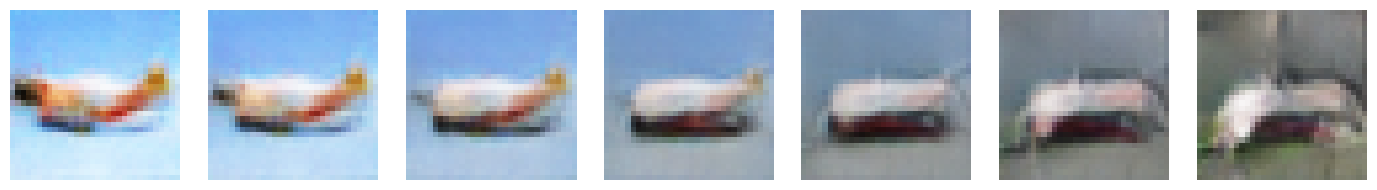

In [66]:
generator = Generator(latent_size=100).to(device)
generator.load_state_dict(torch.load("final_models/final_generator.pth"))

latent_space_interpolation(generator, latent_steps=7)